# 5 Datos

## 5.1 Algunos conjuntos de imágenes comunes

**Conjuntos de imágenes descritos:** $\;$ MNIST, EMNIST, Fashion-MNIST, CIFAR-10/100 e ImageNet
 
**Otras fuentes:** $\;$ literatura, modelos y resultados con diferentes conjuntos de datos
* [Lista de conjuntos de datos para investigación en ML de Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* **Google scholar:** $\;$ literatura y resultados recientes; por ejemplo [con MNIST](https://scholar.google.com/scholar?hl=en&as_sdt=0,5&q=mnist&scisbd=1)
* **Portales dedicados:** $\;$ [**paperswithcode**](https://paperswithcode.com), [OpenML](https://www.openml.org), [kaggle](https://www.kaggle.com) y [**Hugging Face**](https://huggingface.co/)

### 5.1.1 MNIST

[**Modified NIST (MNIST):**](http://yann.lecun.com/exdb/mnist) $\;$ corpus de $70\,000$ imágenes $28\times 28$ en gris de dígitos manuscritos; $60\,000$ de training y $10\,000$ de test
* Desde su introducción en los 90, MNIST ha sido ampliamente usado como tarea para la comparación de técnicas de ML
* Hoy en día se considera una tarea "agotada" pues ya se han alcanzado [tasas de error muy reducidas, por debajo del $0.2\%$](https://en.wikipedia.org/wiki/MNIST_database#Classifiers)

**Ejemplo:** $\;$ lectura de MNIST con fetch_openml de sklearn; las primeras $60\,000$ muestras son para training y las $10\,000$ restantes para test

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist_784_X, mnist_784_y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train = mnist_784_X[:60000].astype(np.float32); y_train = mnist_784_y[:60000].astype(np.uint8)
X_test = mnist_784_X[60000:].astype(np.float32); y_test = mnist_784_y[60000:].astype(np.uint8)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


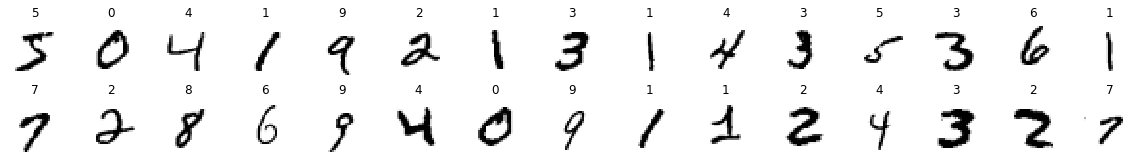

In [2]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(y)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

### 5.1.2 EMNIST

[**Extended MNIST (EMNIST):**](https://www.nist.gov/itl/iad/image-group/emnist-dataset) $\;$ corpus de $814\,255$ imágenes $28\times 28$ en gris de 62 caracteres manuscritos ([0-9], [a-z] y [A-Z])
* Como su nombre indica, se trata de una extensión de MNIST; de hecho, se publicó en 2017 al constatar que MNIST estaba agotado
* No se presenta como un único conjunto de imágenes, sino como una colección de 6 conjuntos o tareas distintas: 
    * Balanced: $814\,255$ caracteres, $47$ clases balanceadas
    * ByClass: $814\,255$ caracteres, $62$ clases no balanceadas
    * ByMerge:  $814\,255$ caracteres, $47$ clases no balanceadas
    * Digits: $280\,000$ caracteres, $10$ clases balanceadas
    * Letters: $145\,600$ caracteres, $26$ clases balanceadas
    * MNIST: $70\,000$ caracteres, $10$ clases balanceadas

**Ejemplo:** $\;$ lectura de EMNIST con la [librería emnist](https://pypi.org/project/emnist)

In [3]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples, extract_test_samples
dataset = 'byclass'
X_train, y_train = extract_training_samples(dataset)
X_test, y_test = extract_test_samples(dataset)
print(dataset, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

byclass (697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


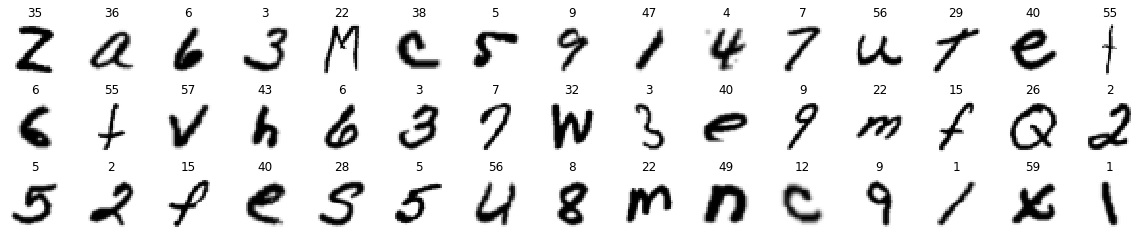

In [5]:
import matplotlib.pyplot as plt
nrows = 3; ncols = 15
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); ax.set_title(f"{y}"); ax.imshow(x, cmap=plt.cm.gray_r, interpolation="none")

### 5.1.3 Fashion-MNIST

[**Fashion-MNIST:**](https://github.com/zalandoresearch/fashion-mnist) $\;$ corpus de $70\,000$ imágenes $28\times 28$ en gris de 10 prendas de ropa; $60\,000$ de training y $10\,000$ de test
* Su formato es idéntico a MNIST pues, al igual que EMNIST, se publicó en 2017 como tarea continuadora de la ya agotada MNIST

**Ejemplo:** $\;$ lectura de Fashion-MNIST con fetch_openml de sklearn

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
fashion_mnist_X, fashion_mnist_y = fetch_openml('Fashion-MNIST', return_X_y=True, as_frame=False, parser='auto')
X_train = fashion_mnist_X[:60000].astype(np.float32); y_train = fashion_mnist_y[:60000].astype(np.uint8)
X_test = fashion_mnist_X[60000:].astype(np.float32); y_test = fashion_mnist_y[60000:].astype(np.uint8)
labels = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


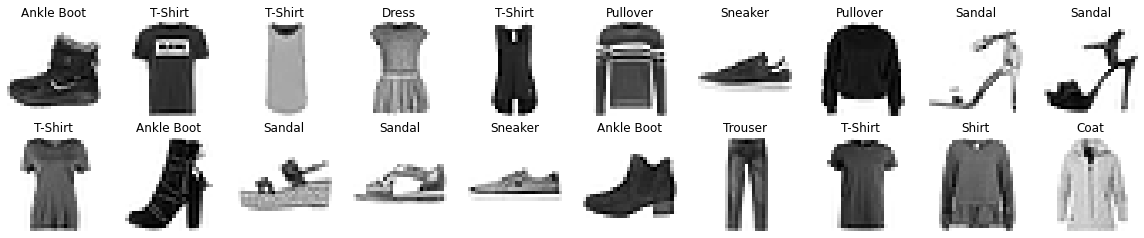

In [7]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(28, 28); ax.set_title(labels[y])
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none")

### 5.1.4 CIFAR-10 y CIFAR-100

[**CIFAR-10:**](https://www.cs.toronto.edu/~kriz/cifar.html) $\;$ corpus de $60\,000$ imágenes $32\times 32$ a color de 10 clases, con $6\,000$ imágenes por clase; $50\,000$ de training y $10\,000$ de test

* Publicado en 2009, CIFAR-10 es uno de los [corpus más populares en ML de los últimos años](https://paperswithcode.com/datasets?q=&v=lst&o=cited)

[**CIFAR-100:**](https://www.cs.toronto.edu/~kriz/cifar.html) $\;$ como CIFAR-10, salvo que comprende 100 clases, con $600$ imágenes por clase

**Ejemplo:** $\;$ lectura de CIFAR-10 y CIFAR-100

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_10_X, cifar_10_y = fetch_openml('CIFAR_10', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_10_X[:50000]; y_train = cifar_10_y[:50000].astype('uint8')
X_test = cifar_10_X[50000:]; y_test = cifar_10_y[50000:].astype('uint8')
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


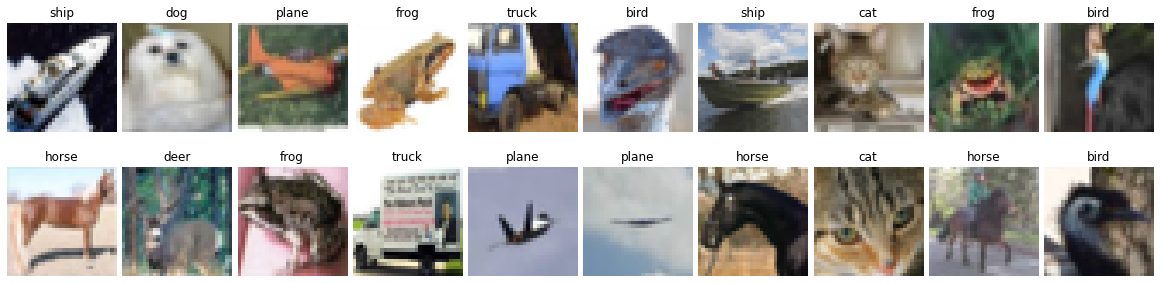

In [9]:
import matplotlib.pyplot as plt
nrows = 2; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); ax.set_title(labels[y])
    ax.imshow(image, interpolation="none")

In [10]:
import numpy as np
from sklearn.datasets import fetch_openml
cifar_100_X, cifar_100_y = fetch_openml('CIFAR-100', return_X_y=True, as_frame=False, parser='auto')
X_train = cifar_100_X[:50000]; y_train = cifar_100_y[:50000].astype('uint8')
X_test = cifar_100_X[50000:]; y_test = cifar_100_y[50000:].astype('uint8')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3072) (50000,) (10000, 3072) (10000,)


In [11]:
fine_labels = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
    'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
    'cattle', 'chair',  'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo',
    'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 
    'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 
    'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper',
    'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
    'willow_tree', 'wolf', 'woman', 'worm')
coarse_labels = ('aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables', 
    'household electrical device', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals', 'trees',
    'vehicles 1', 'vehicles 2')
fine2coarse = (4, 1, 14, 8, 0, 6, 7, 7, 18, 3, 3, 14, 9, 18, 7, 11, 3, 9, 7, 11, 6, 11, 5, 10, 7, 6, 13, 
    15, 3, 15, 0, 11, 1, 10, 12, 14, 16, 9, 11, 5, 5, 19, 8, 8, 15, 13, 14, 17, 18, 10, 16, 4, 17, 4, 2, 
    0, 17, 4, 18, 17, 10, 3, 2, 12, 12, 16, 12, 1, 9, 19, 2, 10, 0, 1, 16, 12, 9, 13, 15, 13, 16, 19, 2, 
    4, 6, 19, 5, 5, 8, 19, 18, 1, 2, 15, 6, 0, 17, 8, 14, 13)

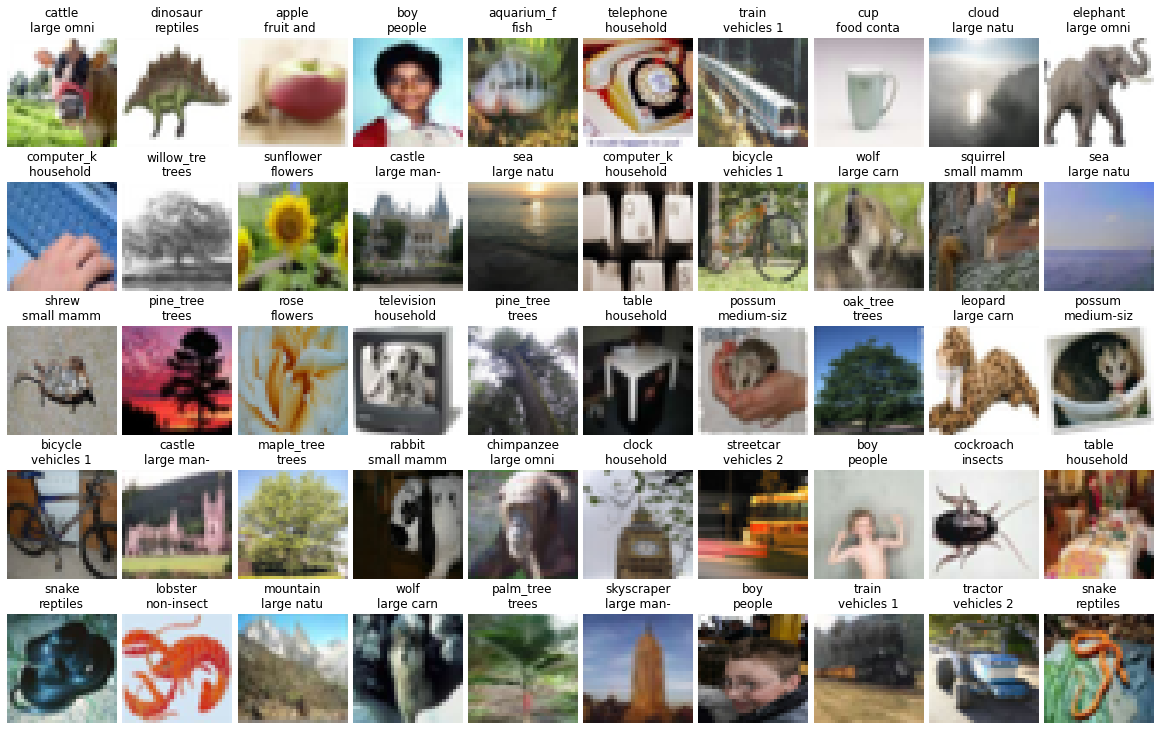

In [12]:
import matplotlib.pyplot as plt
nrows = 5; ncols = 10
_, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20*nrows/ncols), constrained_layout=True)
for ax, x, y in zip(axs.flat, X_train, y_train):
    ax.set_axis_off(); image = x.reshape(3, 32, 32).transpose(1, 2, 0); 
    ax.set_title(fine_labels[y][:10]+ "\n" + coarse_labels[fine2coarse[y]][:10])
    ax.imshow(image, interpolation="none")

### 5.1.5 ImageNet

[**ImageNet:**](https://image-net.org) $\;$ corpus de $14\,197\,122$ imágenes anotadas de acuerdo con la [jerarquía WordNet](https://wordnet.princeton.edu)
* Al igual que CIFAR-10, se publicó en 2009 y es uno de los [corpus más populares en ML de los últimos años](https://paperswithcode.com/datasets?q=&v=lst&o=cited)
* Gran parte de su popularidad se debe a que sirvió de base en la competición **ImageNet Large Scale Visual Recognition Challenge (ILSVRC),** de 2010 a 2017, para la evaluación de algoritmos de detección de objetos y clasificación de imágenes a gran escala
* Aunque se considera prácticamente "saturado", ImageNet y diversos subconjuntos del mismo se siguen empleando como tareas de referencia; veáse por ejemplo en [huggingface](https://huggingface.co/datasets?sort=downloads&search=imagenet)

## 5.2 Algunos conjuntos de texto comunes

**Procesamiento del lenguaje natural (NLP, natural language processing):** $\;$ incluye gran variedad de tareas sobre texto en las que el ML obtiene grandes resultados

### 5.2.1 Clasificación de texto

**Clasificación de texto:** $\;$ una tarea sencilla para aplicaciones como el **filtrado de correo spam** y el **análisis de sentimiento,** esto es, de la polaridad positiva o negativa de la opinión expresada en un texto

**Ejemplo:** $\;$ el **IMDB movie review dataset** contiene 50K revisiones (+ o -) de películas; mitad para entrenamiento y mitad de test:
* this film was just brilliant casting location... (+)
* big hair big boobs bad music and a giant safety... (-)

### 5.2.2 Traducción automática

**Traducción automática (MT, machine translation):** $\;$ estudia la automatización de la traducción de textos (o habla) entre idiomas

**Textos paralelos:** $\;$ colecciones de pares ejemplos de traducción que los sistemas más avanzados emplean para entrenar DNNs

**Ejemplo:** $\;$ el corpus [Europarl v10](https://www.statmt.org/europarl/v10/training) con ejemplos EsPt, DeEn, FrEn, etc.

| Lengua fuente                                                                  | Lengua destino                                                                     |
|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------|
| Ratificación y ampliación de los convenios actualizados de la OIT (votación)   | Ratificação e aplicação das convenções que a OIT considerou actualizadas (votação) |
| Ratifizierung und Umsetzung der aktualisierten IAO-Übereinkommen (Abstimmung)  | The ratification and implementation of the updated ILO conventions (vote)          |
| Ratification et mise en œuvre des conventions de l'OIT mises à jour (vote)     | The ratification and implementation of the updated ILO conventions (vote)          |

### 5.2.3 Otras tareas seq2seq

**seq2seq:** $\;$ generalización de MT que estudia el aprendizaje de una transformación de una secuencia (de entrada) $\boldsymbol{x}$ en otra (de salida) $\boldsymbol{y}$

**Tareas seq2seq:** $\;$ **resumen (automático) de documentos,** **búsqueda de respuestas (question answering),** etc.

**Ejemplo:** $\;$ el corpus **Stanford Question Answering Dataset (SQuAD)** incluye 100K preguntas sobre pasajes (texto) de Wikipedia

> T: In meteorology, precipitation is any product of the condensation of atmospheric water vapor that falls under <span style="color:blue">gravity</span>. The
> main forms of precipitation include drizzle, rain, sleet, snow, <span style="color:red">graupel</span> and hail... Precipitation forms as smaller droplets
> coalesce via collision with other rain drops or ice crystals <span style="color:orange">within a cloud</span>. Short, intense periods of rain in scattered
> locations are called “showers”.

> Q1: What causes precipitation to fall? A1: <span style="color:blue">gravity</span>

> Q2: What is another main form of precipitation besides drizzle, rain, snow, sleet and hail? A2: <span style="color:red">graupel</span>

> Q3: Where do water droplets collide with ice crystals to form precipitation? A3: <span style="color:orange">within a cloud</span>

### 5.2.4 Modelado del lenguaje

**Language modeling (LM):** $\;$ estudia cómo aprender un modelo incondicional, $p(\boldsymbol{x})$, siendo $\boldsymbol{x}$ un texto de entrada sin salida correspondiente, por lo que puede decirse que se trata de una tarea de aprendizaje no supervisado

**Textos monolíngües:** $\;$ LM suele hacer uso de grandes colecciones de textos monolíngües que, al igual que en muchas otras tareas de aprendizaje no supervisado, son datos no supervisados fáciles de conseguir

**n-gramas:** $\;$ modelos de lenguaje estadísticos que se limitan a estimar $p(\boldsymbol{x})$ a partir de tablas de cuentas de secuencias de $n$ palabras; han sido los modelos dominantes durante décadas (desde los 60)

**Modelos de lenguaje neuronales:** $\;$ modelos de lenguaje basados en DNNs entrenadas con el mayor número posible de ejemplos; son los modelos que obtienen mejores resultados actualmente

**Modelos de lenguaje condicionales:** $\;$ si el modelo de lenguaje genera una salida en respuesta a una entrada dada (prompt), como en seq2seq, podemos verlo como un modelo generativo condicional

**Generación de lenguaje natural (NLG, natural language generation):** $\;$ área NLP muy popular tras el desarrollo del grandes modelos de lenguaje condicionales para resumen automático de documentos, búsqueda de respuestas, subtitulado de imágenes, diálogo (chatbots), escritura creativa y humor computacional, etc.

## 5.3 Preproceso de datos de entrada discretos

### 5.3.1 Codificación one-hot

**Codificación one-hot o dummy (ficticia):** $\;$ de una variable categórica $x$ que puede tomar $K$ valores
$$\operatorname{one-hot}(x)=[\mathbb{I}(x=1),\dotsc,\mathbb{I}(x=K)]$$

**Ejemplo:** si $x$ puede valer R, G o B
$$\begin{align*}
\operatorname{one-hot}(R)&=[1, 0, 0]\\%
\operatorname{one-hot}(G)&=[0, 1, 0]\\%
\operatorname{one-hot}(B)&=[0, 0, 1]%
\end{align*}$$

### 5.3.2 Cruce de variables

**Limitaciones de las codificaciones one-hot:** $\;$ si se tiene un modelo lineal para múltiples variables categóricas de entrada, las codificaciones one-hot permite capturar los efectos principales de cada variable, pero no los de interacción entre ellas

**Cruces de variables (feature crosses):** $\;$ si se tiene un modelo lineal para múltiples variables categóricas de entrada, facilitan la captura de interacciones entre las variables de entrada mediante la introducción de nuevas variables que las cruzan

**Ejemplo:** $\;$ eficiencia de un vehículo con dos variables más una tercera que las cruza
$$\begin{align*}
x_1\in\{S, T, F\}:&\;\text{tipo; SUV, Truck o Family car}\\%
x_2\in\{U, J\}:&\;\text{origen; USA o Japón}\\%
x_3\in\{S, T, F\}\times\{U, J\}:&\;\text{cruce de $x_1$ y $x_2$}%
\end{align*}$$

## 5.4 Preproceso de texto

Aspectos a considerar para trabajar con (documentos de) texto:
* Los documentos puede ser de diferentes longitudes, por lo que no podemos tratarlos directamente como vectores de características de dimensión fija.
* Las palabras son variables categóricas con muchos valores posibles (la talla del vocabulario), por lo que sus codificaciones one-hot son de muy alta dimensión y sin noción de similitud natural.
* **Out-of-vocabulary (OOV) words:** podemos encontrar palabras en test que no hayan sido vistas en entrenamiento.

### 5.4.1 El modelo bolsa de palabras

El modelo **bag of words** ignora el orden de las palabras en un documento, reduciéndolo a un vector de cuentas (de ocurrencias) de cada **palabra, término o token** en un vocabulario fijo de referencia. Para fijar un vocabulario de referencia de talla reducida, se suelen aplicar varias técnicas de preproceso como: eliminación de signos de puntuación, **lowercasing** (conversión a minúsculas), **stop word removal** (supresión de palabras funcionales) y **word stemming** (lematización).
Llamamos **vector space model** al modelo de representación de documentos que resulta: un espacio vectorial en el que cada documento viene representado mediante un vector de $D$ dimensiones. Formalmente, dado un documento $n$ de longitud $T_n$ y con token $x_{nt}$ en la posición $t$, su representación vectorial, $\tilde{\boldsymbol{x}}_n$, incluye el número de ocurrencias de cada palabra $v$ del vocabulario:
$$\tilde{x}_{nv}=\sum_{t=1}^{T_n}\mathbb{I}(x_{nt}=v)$$
Llamamos **term frequency matrix** a la matriz $D\times N$ donde $\text{TF}_{ij}$ es la frecuencia del término $i$ en el documento $j$.

**Ejemplo:** matriz TF con $D=N=20$; los píxeles más oscuros indican términos más frecuentes
<div align="center"><img src="Figure_1.15.png"/></div>

### 5.4.2 Representación TF-IDF

La **representación TF-IDF** es una representación clásica de documentos de texto que mejora la TF (bag of words).

Por un lado, sustituye la TF por la **TF log-escalada** para restar importancia a los términos más frecuentes pues, por lo general, tienen poca carga semántica:
$$\log(\operatorname{TF}_{ij}+1)$$

Por otro lado, introduce la **inverse document frequency (IDF)** para estimar la importancia de un término $i$ en proporción inversa al número de documentos que lo incluyen, $\operatorname{DF}_i$, también log-escalada:
$$\operatorname{IDF}_i=\log\frac{N}{1+\operatorname{DF}_i}$$

La TF-IDF combina la TF log-escalada con la IDF:
$$\operatorname{TFIDF}_{ij}=\log(\operatorname{TF}_{ij}+1)\cdot\operatorname{IDF}_i$$

Aunque la TF-IDF mejora la TF dando más peso a las palabras más informativas, esta representación no tiene en cuenta que una mayor proximidad espacial de las palabras debería indicar mayor similitud semántica, cosa (implícitamente) asumida por la mayoría de modelos predictivos.

### 5.4.3 Word embeddings

Sea $\boldsymbol{x}_{nt}\in\{0,1\}^V$ la $t$-ésima palabra del $n$-ésimo documento, representada con un vector disperso one-hot sobre un vocabulario de $V$ palabras. Llamamos **word embedding** de $\boldsymbol{x}_{nt}$ a su transformación en un vector denso de dimensión $K$ reducida, $\boldsymbol{e}_{nt}=\mathbf{E}\,\boldsymbol{x}_{nt}$, donde $\mathbf{E}\in\mathbb{R}^{K\times V}$ es una matriz aprendida para que la proximidad vectorial indique similitud semántica. Por extensión, llamamos **bag of word embeddings** a la suma (o promedio) de los word embeddings de todas sus palabras:
$$\bar{\boldsymbol{e}}_n%
=\sum_{t=1}^{T_n}\boldsymbol{e}_{nt}%
=\mathbf{E}\sum_{t=1}^{T_n}\boldsymbol{x}_{nt}%
=\mathbf{E}\,\tilde{\boldsymbol{x}}_n$$
La bolsa de word embeddings puede integrarse fácilmente en un modelo de regresión logística:
$$p(y=c\mid\boldsymbol{x}; \boldsymbol{\theta})=\mathcal{S}_c(\mathbf{WE}\tilde{\boldsymbol{x}}_n)$$
Además, si se emplea una matriz $\mathbf{E}$ **pre-entrenada,** el modelo es lineal con $\mathbf{W}$ y se simplifica el aprendizaje.

### 5.4.4 Palabras fuera de vocabulario

Llamamos **palabras fuera del vocabulario (OOV, out-of-vocabulary)** a palabras encontradas en test que no han sido vistas en entrenamiento; por ejemplo, nombres propios de personas y lugares.

Un heurístico convencional para tratar las palabras OOV consiste en reemplazarlas por un símbolo especial, UNK. Ahora bien, este heurístico renuncia a adivinar parte del significado al menos. Por ejemplo, de amaxofobia (miedo a conducir un vehículo o viajar en él) podríamos adivinar que significa aversión exagerada a alguien o algo gracias al sufijo.

Para adivinar al menos una parte del significado de una palabra desconocida, la alternativa usual al UNK consiste en emplear vocabularios de sub-palabras obtenidos con técnicas de codificación como **byte-pair encoding (BPE).**

## 5.5 Datos perdidos

**Mecanismos que producen datos perdidos:** $\;$ condicionan el tratamiento de los mismos en una matriz de datos
* **Missing completely at random (MCAR):** $\;$ completamente al azar
* **Missing at random (MAR):** $\;$ condicionados por los observados
* **Missing not at random (MNAR):** $\;$ no aleatorios; dependientes tanto de observados como perdidos

**MAR y MCAR más sencillos que MNAR:**
* En MAR y MCAR podemos ignorar el mecanismo que origina los datos perdidos pues no aporta información relevante sobre sus valores
* En MNAR conviene establecer un modelo del mecanismo pues la pérdida de datos está relacionada con sus posibles valores
* Por simplicidad, en ML solemos asumir un mecanismo MAR o, más simplemente, MCAR

**Eliminación de entradas con datos perdidos:** $\;$ si se tienen pocas entradas con datos perdidos, la opción más sencilla es descartarlas

**Imputación del valor medio:** $\;$ el heurístico más común para completar (rellenar) un dato perdido consiste en imputar el valor medio de su característica correspondiente; este heurístico resulta especialmente apropiado en MCAR
    
**Modelos condicionales generativos:** $\;$ podemos ajustar un modelo generativo a las entradas que capture correlaciones entre características y usarlo para completar los datos perdidos; esta técnica tiene interés en MAR, esto es, cuando los datos perdidos están correlacionados con los observados